# TP 01: Linear Regression

## Regression analysis of the investment data

## SD-TSIA204
### Davi BARRETO FAÇANHA

### Exercice 1. 
(Regression analysis of the investment data) If needed, a tutorial on pandas can be helpful: http://pandas.pydata.org/pandas-docs/stable/tutorials.html . Let us use the Investment Data Set 1 downloadable from the institution web site as a CSV (blank separated) file “invest.txt”. Before going to the Steps of this tutorial, please take a look at the preceding it preliminary part, which suggests a declarative overview of several notions connected to the linear regression model.

In [1]:
# Imports used at this TP
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import linear_model, metrics
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Openning the Archives
arquivo = open( 'invest.txt' , 'r')
arquivo.readlines()[:6]

['"year" "gnp" "invest" "cpi" "interest"\n',
 '1968 873.4 133.3 82.54 5.16\n',
 '1969 944 149.3 86.79 5.87\n',
 '1970 992.7 144.2 91.45 5.95\n',
 '1971 1077.6 166.4 96.01 4.88\n',
 '1972 1185.9 195 100 4.5\n']

In [3]:
# Using Pandas for Data View
data = pd.read_csv('invest.txt', sep=" ", header=0)
data.columns = ["year", "gnp", "invest", "cpi", "interest"]
data[:5]

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


### Exercice 2.
Plot the data with Gross National Product (GNP, column “gnp”) being the abscissa and Investment (column “invest”) being the ordinate.

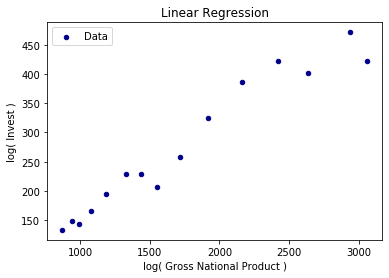

In [4]:
# Scatter Plot of GNP and INVEST using the Panda Library

data.plot.scatter(x='gnp', y='invest', c='DarkBlue', label='Data')
plt.xlabel('log( Gross National Product )')
plt.ylabel('log( Invest )')

plt.title('Linear Regression')
plt.legend()
plt.show()

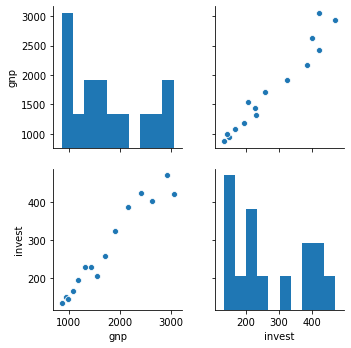

In [5]:
# Here I also do a pairplot in order to analyse the two cases between
# GNP and INVEST in order to make an extra analyse.

sns.pairplot(data, vars=['gnp', 'invest'])

### Exercice 03.
For the linear regression of Investment on GNP, estimate the intercept and the slope and their standard deviations, as well as the  etermination coefficient for the ordinary least squares. Output them in a readable form.

In [6]:
# Log-Tranformation into GNP and INVEST columns.
data['gnp'] = np.log(data['gnp'])
data['invest'] = np.log(data['invest'])
gnp = data['gnp']
invest = data['invest']

In [7]:
# Centralized values for the GNP(x-axis) and the INVEST(y-axis).
gnp_d = gnp - gnp.mean()
invest_d = invest - invest.mean()

In [8]:
beta_1 = sum(gnp_d*invest_d)/sum(gnp_d**2)
beta_0 = invest.mean() - beta_1*gnp.mean()
n = len(data)

In [9]:
# Squared Sigma Hat value: Called SSH as an abreviation.
ssh = (1/(n-2))*sum( (invest-(beta_0+beta_1*gnp))**2 )

In [10]:
# Variance of the Slope and the Intercept.
var_beta_0 = ssh*((1/n)+(gnp.mean()**2)/sum(gnp_d**2))
var_beta_1 = ssh/sum(gnp_d**2)

In [11]:
# Standard Deviation of the Slope and the Intecept.
sd_0 = np.sqrt(var_beta_0)
sd_1 = np.sqrt(var_beta_1)

In [12]:
# Linear Regression Function
y_regr = beta_0 + beta_1*gnp 

In [13]:
# Determination Coefficient (R^2
R_2 = 1 - sum((invest - y_regr)**2)/sum(invest_d**2)

<function matplotlib.pyplot.show(*args, **kw)>

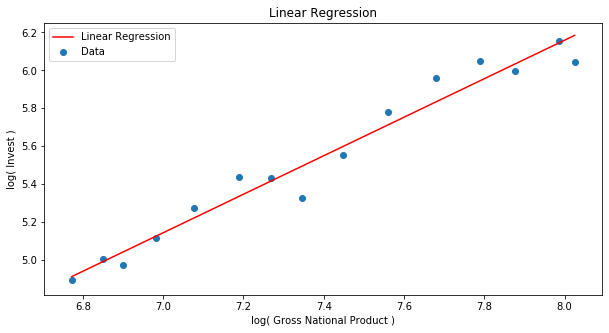

In [14]:
# Increasing the Default Figure Size

plt.figure(figsize=(10, 5))

# Scatter Plot

plt.scatter(gnp, invest, label='Data')
plt.xlabel('log( Gross National Product )')
plt.ylabel('log( Invest )')

# Linear Regression Plot

plt.plot(gnp, y_regr, 'r', label='Linear Regression')

plt.title('Linear Regression')
plt.legend()
plt.show

In [15]:
print('Intercept: ', beta_0)
print('Slope: ', beta_1)
print('Standard Deviation of Intercept: ',sd_0 )
print('Standard Deviaton of Slope: ', sd_1)
print('Determination Coefficient (R^2)', R_2)

Intercept:  -1.9635913352301833
Slope:  1.015281401598871
Standard Deviation of Intercept:  0.4095472716623082
Standard Deviaton of Slope:  0.055383060354852805
Determination Coefficient (R^2) 0.9627572956057855


### Exercice 04.
Test the significance of the slope using the Student-t test. Report the value of the test statistic and the p-value.

#### <center>t-student Distribution:
<img src="t_student.gif" width="400" alt="Seen and Unseen Instagram's Behavior">
<center> source: http://www.chups.jussieu.fr/polys/biostats/poly/POLY.Anx.A.6.html

The function used below is the stats.t.cdf().

'Stats' is a library of the Scipy framework, wich allows us to work with distribution functions commonly used in inferential statistics, as: Normal, Chi-Squared, Student... etc.

Selecting the 't' option, we chose the cdf (Cumulative Density Function) calculus.

We multiply the result by two in order to know what is called 'a twotailed test'.

$$H_0 = \frac{\hat{\beta}_j}{\sqrt{V[\hat{\beta}_j]}} \notin [-t_{1-\frac{\alpha}{2}};-t_{1-\frac{\alpha}{2}}]$$

In [16]:
#In our case, the Slope is the Beta 1.
h_0 = beta_1/sd_1
p_value = (1 - stats.t.cdf(h_0, n-2))*2

In [17]:
print('Value for the H_0 ', h_0)
print('P-Value', p_value)

Value for the H_0  18.33198445686668
P-Value 1.1363709973011282e-10


## Discussion:
Because we find a $p_{value}$ with an order of $10^{-10}$, therefore too close to zero, we reject the $H_{0}$.

### Exercice 05.
For the GNP value 1000, estimate the necessary Investment, provide confidence and prediction intervals for the 90% level.

#### <center>90% Confidence of the T-Student:
<img src="q_value_TS.png" width="600" alt="From Wikipedia">
<center> source: https://fr.wikipedia.org/wiki/Loi_de_Student

The figure above is just help the understandig of the Confidence Test for a **T-Student Distribution** at level 90%.

In [18]:
# We already have the Linear Regression Function y(gnp). Thus, we just
# apply the 1000 into the function and check the output.

y_pred_1 = beta_0 + beta_1 * np.log(1000)

In [19]:
# To know the quantile interval given a confidence percentage wanted,
# we use no more the cdf() but the Percent Point Function - ppf().

q_value_90 = stats.t.ppf((1-0.1/2), n-2)

$$ Quantiles = [-t_{1 - \frac{\alpha}{2}}, t_{1 - \frac{\alpha}{2}}] = [-1.77, 1.77] $$

In [20]:
# Confident Interval for the Gnp = 1000
ci_1_pred = beta_0 + beta_1 * np.log(1000) + q_value_90 * np.sqrt(ssh) \
    * np.sqrt(1 / n + (np.log(1000) - gnp.mean()) ** 2 / sum(gnp_d
              ** 2))
ci_2_pred = beta_0 + beta_1 * np.log(1000) - q_value_90 * np.sqrt(ssh) \
    * np.sqrt(1 / n + (np.log(1000) - gnp.mean()) ** 2 / sum(gnp_d
              ** 2))

In [21]:
# Prediction Interval for the Gnp = 1000
pi_1_pred = beta_0 + beta_1 * np.log(1000) + q_value_90 * np.sqrt(ssh) \
    * np.sqrt(1 + 1 / n + (np.log(1000) - gnp.mean()) ** 2 / sum(gnp_d
              ** 2))
pi_2_pred = beta_0 + beta_1 * np.log(1000) - q_value_90 * np.sqrt(ssh) \
    * np.sqrt(1 + 1 / n + (np.log(1000) - gnp.mean()) ** 2 / sum(gnp_d
              ** 2))

In [22]:
print('Predicted Investiment for the Gnp = 1000: ', np.exp(y_pred_1))
print('Q-Value for the Student-T distribution at 90%: [', -q_value_90, ',', q_value_90,']')
print('Confident Intervals for the Predicted Gnp: [', ci_2_pred, ',', ci_1_pred, ']')
print('Predicted Intervals for the Predicted Gnp: [', pi_2_pred, ',', pi_1_pred, ']')

Predicted Investiment for the Gnp = 1000:  155.97942793105466
Q-Value for the Student-T distribution at 90%: [ -1.7709333959867988 , 1.7709333959867988 ]
Confident Intervals for the Predicted Gnp: [ 4.988222845971109 , 5.111225406662491 ]
Predicted Intervals for the Predicted Gnp: [ 4.882820023438679 , 5.216628229194921 ]


### Exercice 06.
On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the
estimated regression line, the confidence and prediction intervals for all values of log(GNP) between
its minimum and maximum in the data set.

In [23]:
# Confident Interval for the vector X
ci_1 = beta_0 + beta_1 * gnp + q_value_90 * np.sqrt(ssh) * np.sqrt(1
        / n + gnp_d ** 2 / sum(gnp_d ** 2))
ci_2 = beta_0 + beta_1 * gnp - q_value_90 * np.sqrt(ssh) * np.sqrt(1
        / n + gnp_d ** 2 / sum(gnp_d ** 2))

In [24]:
# Prediction Interval for the vector X
pi_1 = beta_0 + beta_1 * gnp + q_value_90 * np.sqrt(ssh) * np.sqrt(1
        + 1 / n + gnp_d ** 2 / sum(gnp_d ** 2))
pi_2 = beta_0 + beta_1 * gnp - q_value_90 * np.sqrt(ssh) * np.sqrt(1
        + 1 / n + gnp_d ** 2 / sum(gnp_d ** 2))

<function matplotlib.pyplot.show(*args, **kw)>

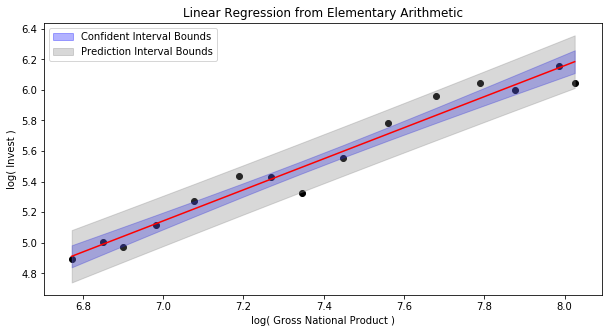

In [25]:
# Increasing the Default Figure Size

plt.figure(figsize=(10, 5))

# Scatter Plot

plt.scatter(gnp, invest, color='black')
plt.xlabel('log( Gross National Product )')
plt.ylabel('log( Invest )')

# Linear Regression Plot

plt.title('Linear Regression from Elementary Arithmetic')
plt.plot(gnp, y_regr, 'r')
plt.fill_between(
    gnp,
    ci_1,
    ci_2,
    color='blue',
    alpha=0.3,
    label='Confident Interval Bounds',
    )
plt.fill_between(
    gnp,
    pi_1,
    pi_2,
    color='gray',
    alpha=0.3,
    label='Prediction Interval Bounds',
    )

plt.legend(loc='upper left')

plt.show

### Exercice 07.
Estimate the intercept, the slope, and the determination coefficient and predict the necessary Investment for the GNP value 1000 using existing functionality. The class **LinearRegression()** from  **klearn.linear_model** is suggested but not obligatory; any other available implementation of the linear regression can be used instead. Report the estimated values and make sure that those calculated ‘by hand’ (Steps 3 and 5) coincide with the ones obtained using existing implementation.

In [26]:
x_07 = np.array(gnp).reshape(-1,1)
y_07 = np.array(invest)
x_pred = np.array(np.log(1000)).reshape(-1,1)

In [27]:
# Creation of the Model
model = linear_model.LinearRegression()

In [28]:
# Train the model using the training sets
model.fit(x_07, y_07)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Make predictions using the testing set
y_pred_2 = model.predict(x_pred)
y_regr_2 = model.predict(x_07)

In [30]:
# Getting the Intercept and the Slope from the Model
slope_pred = model.coef_
intercept_pred = model.intercept_

In [31]:
print('Intercept Calculated: ', beta_0)
print('Slope Calculated: ', beta_1)
print('\nIntercept with klearn.linear_model: ', intercept_pred)
print('Slope with klearn.linear_model: ', *slope_pred)
print('\nPrediction for the first model: ', np.exp(y_pred_1))
print('Prediction for the klearn.linear_model: ', *np.exp(y_pred_2))
print('\nY predicted based on our model: [', *y_regr_2, ']')

Intercept Calculated:  -1.9635913352301833
Slope Calculated:  1.015281401598871

Intercept with klearn.linear_model:  -1.9635913352301815
Slope with klearn.linear_model:  1.015281401598871

Prediction for the first model:  155.97942793105466
Prediction for the klearn.linear_model:  155.97942793105494

Y predicted based on our model: [ 4.912293972835826 4.991214359863123 5.042285387533236 5.12560254854982 5.222831615535023 5.33650914638573 5.415841912263473 5.494152055366388 5.599154645753293 5.711118410216661 5.833432175063308 5.946073470302189 6.0326808557852765 6.143818738959827 6.1844001724730004 ]


### Exercice 08.
On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the regression line and the predicted point (in a different color). The graphic should coincide with the corresponding elements from the one in Step 6.

<function matplotlib.pyplot.show(*args, **kw)>

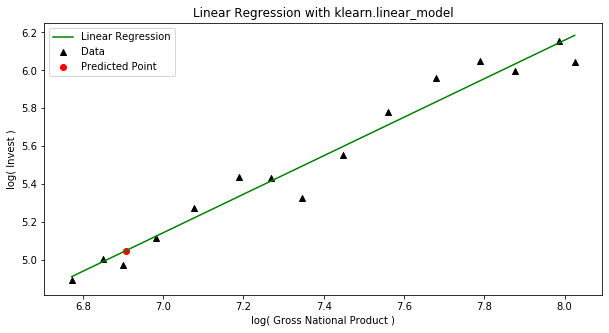

In [32]:
# Increasing the Default Figure Size

plt.figure(figsize=(10, 5))

# Scatter Plot

plt.scatter(gnp, invest, color='black', label='Data', marker='^')
plt.scatter(np.log(1000), y_pred_2, color='r', label='Predicted Point')
plt.xlabel('log( Gross National Product )')
plt.ylabel('log( Invest )')

# Linear Regression Plot

plt.plot(gnp, y_regr, 'g', label='Linear Regression')
plt.title('Linear Regression with klearn.linear_model')

plt.legend()

plt.show


<function matplotlib.pyplot.show(*args, **kw)>

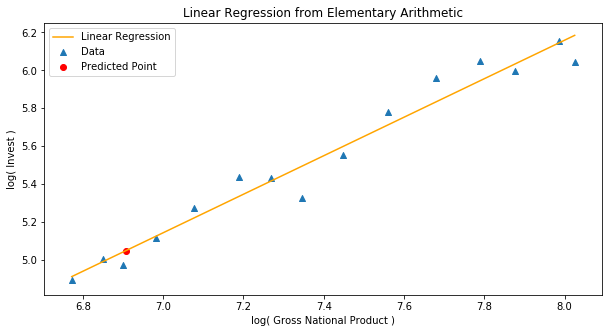

In [33]:
# Increasing the Default Figure Size

plt.figure(figsize=(10, 5))

# Scatter Plot

line1 = plt.scatter(gnp, invest, label='Data', marker='^')
line2 = plt.scatter(np.log(1000), y_pred_1, color='r',
                    label='Predicted Point')
plt.xlabel('log( Gross National Product )')
plt.ylabel('log( Invest )')

# Linear Regression Plot

plt.plot(gnp, y_regr, 'orange', label='Linear Regression')
plt.title('Linear Regression from Elementary Arithmetic')

plt.legend()

plt.show

### Exercice 09.
For the linear regression of Investment on GNP and Interest, compute the associated Gram matrix.
Is it of full rank?

In [34]:
# Creating the Matrix of features: Interest and GNP.

x_mtx = []

# The first column is composed of ones, in order to represent the
# intercept coefficient.

x_mtx.append(np.ones(n))
x_mtx.append(np.array(gnp))
x_mtx.append(np.array(data['interest']))

In [35]:
# The matrix is transposed two times. The first one to turn the
# matrix into the Design Matrix format.
# The second one is to get the transposed Design Matrix at the
# np.array format as well.

x_mtx = np.transpose(x_mtx)
x_mtx_T = np.transpose(x_mtx)

The Gram Matrix is calculated as below:
$$ G = \frac{X^TX}{n} $$

In [36]:
# We calcule the Gram Matrix.
Gram_Matrix = x_mtx_T.dot(x_mtx/n)

For a square matrix, if the determinant is zero, we have a deficient rank. Otherwise, we have a full rank.
The Gram Matrix's determinant is $0.38$, therefore, it is a full rank.

In [37]:
# Determinant of the Matrix
det_GM = np.linalg.det(Gram_Matrix)

As well, we can find the eigen-values for infering the full-rankness of the GM.

In [38]:
eigen_values_GM = np.linalg.eig(Gram_Matrix)[0]

In [39]:
print('Determinant of the Gram Matrix: ', det_GM)
print('Eigen Values for the Gram Matrix: ', eigen_values_GM)

Determinant of the Gram Matrix:  0.38702748682364757
Eigen Values for the Gram Matrix:  [1.15858127e+02 1.21579798e-03 2.74760242e+00]


### Exercice 10.
For the linear regression of Investment on GNP and Interest, estimate the three regression coefficients and their standard deviations, as well as the determination coefficient for the ordinary least squares. Additionally, test significance of each coefficient using the Student-t test. Report the regression coefficients, corresponding to them p-values, and the determination coefficient in a readable form. Discuss significance of the estimated regression coefficients.

In [40]:
# Centralized values for the INTEREST.

interest = data['interest']
interest_d = interest - interest.mean()

In [41]:
y_mv = []
y_mv.append(np.array(invest))
y_mv = np.transpose(y_mv)

In [42]:
y_mv_d = []
y_mv_d.append(np.array(invest_d))
y_mv_d = np.transpose(y_mv_d)

After checking that our Gram Matrix is full ranked and, therefore, invertible, we have a **Uniquely Defined Matrix**. 
Ergo, our coeffs are going to be found using the method below:
$$\hat{\theta}_{n} = (X^TX)^{-1}X^TY)$$

In [43]:
# Finding the coeffs by the method above.
coeffs = np.linalg.inv(x_mtx_T.dot(x_mtx))
coeffs = coeffs.dot(x_mtx_T)
coeffs = coeffs.dot(y_mv)

In [44]:
# Squared Sigma Hat value: Called SSH as an abreviation.
ssh_mv = (1/(n-3))*sum((y_mv - x_mtx.dot(coeffs))**2)

Than we calcule the following matrix,

$$ C = \hat{\sigma}^2(X^TX)^{-1} $$

in order to get the diagonal and find the Variances, by definition:

$$ V[\hat{\beta}_{j}] = C_{jj} $$

In [45]:
# Calulus of the C-Matrix for findind the variances
C = ssh_mv*np.linalg.inv((x_mtx_T.dot(x_mtx)))

In [46]:
# Variance of each coeff
var_coeffs = []
for i in range(0,len(C)):
    var_coeffs.append(C[i][i])

In [47]:
# Standard Deviation of the Slope and the Intecept.
sd_coeffs = np.sqrt(var_coeffs)

In [48]:
# Linear Regression Function
y_regr_mv = x_mtx.dot(coeffs)

In [49]:
# Determination Coefficient (R^2)
R_2_mv = 1 - sum((y_mv - y_regr_mv)**2)/sum(y_mv_d**2)

In [50]:
# Calculus of the h_0 and the p_value for each coeff.
h_0_mv = coeffs.transpose()/sd_coeffs
p_value_mv = (1 - stats.t.cdf(abs(h_0_mv), n-3))*2

In [51]:
print('Multivarible Case:-----------')
print('\nIntercept: ', *coeffs[0])
print('Coefficient Beta 1: ', *coeffs[1])
print('Coefficient Beta 2: ', *coeffs[2])
print('\nVariance of Intercept: ',var_coeffs[0])
print('Variance of Beta 1: ', var_coeffs[1])
print('Variance Deviaton of Beta 2: ', var_coeffs[2])
print('\nStandard Deviation of Intercept: ',sd_coeffs[0])
print('Standard Deviaton of Beta 1: ', sd_coeffs[1])
print('Standard Deviaton of Beta 2: ', sd_coeffs[2])
print('\nDetermination Coefficient for Multi-Var (R^2): ', *R_2_mv)
print('P-Values for the Multi-Vari: ', *p_value_mv)
print('\nTest Statistique for each P-value: ', *h_0_mv)

Multivarible Case:-----------

Intercept:  -2.1804547259122575
Coefficient Beta 1:  1.0512426913198811
Coefficient Beta 2:  -0.006528879406102708

Variance of Intercept:  0.4387726972412736
Variance of Beta 1:  0.010416524891898812
Variance Deviaton of Beta 2:  0.00023544462909531384

Standard Deviation of Intercept:  0.6623991977963694
Standard Deviaton of Beta 1:  0.10206137806192317
Standard Deviaton of Beta 2:  0.015344205065604207

Determination Coefficient for Multi-Var (R^2):  0.9633108306726244
P-Values for the Multi-Vari:  [6.43836705e-03 2.59951685e-07 6.78007142e-01]

Test Statistique for each P-value:  [-3.29175327 10.30010285 -0.4254948 ]


## Discussion:
Analysing the $P_{Values}$, we can see that the value for $\beta_{1}$ is a lot smaller if compared to the others. Thus, we reject the $H_{0}$ for $\beta_{1}$ and accept the others.

### Exercice 11.
For the values of GNP “ 1000 and Interest “ 10, predict the log(Investment) and provide confident and prediction intervals at the 99.9% level.

In [52]:
# Predicing the Invest value for Gnp = 1000 and Interest = 10
y_11 = coeffs[0] + np.log(1000)*coeffs[1] + 10*coeffs[2]

In [53]:
# Fixing the quantile parameters to an especific level

level = 0.999
alpha = 1 - level
df = 1 - alpha / 2

# Calculating the Quantile for 0.9995. The quantile found represent the interval [-q,q]

q_value_99 = stats.t.ppf(df, n - 3)

# Creat a test vector with the values to predict: Gnp = 1000 and Interest = 10
# We have this first 1 to include the beta_0

x_test = np.array([1, np.log(1000), 10])
x_test_T = np.transpose(x_test)

This auxiliar variables setted are only to represent the constant of the CI and PI equations.
In order words,
$$ aux_{CI} \; = \; \sqrt{\hat{\sigma}^2x^T(X^TX)^{-1}x}$$
$$ aux_{PI} \; = \; \sqrt{\hat{\sigma}^2(1+x^T(X^TX)^{-1}x)}$$

In [54]:
# CI Constant

aux_ci = x_test_T.dot(np.linalg.inv(x_mtx_T.dot(x_mtx)))
aux_ci = aux_ci.dot(x_test)
aux_ci = np.sqrt(ssh_mv * aux_ci)

# PI Constant

aux_pi = x_test_T.dot(np.linalg.inv(x_mtx_T.dot(x_mtx)))
aux_pi = 1 + aux_pi.dot(x_test)
aux_pi = np.sqrt(ssh_mv * aux_pi)

# Confidents Intervals

ci_1_mv = x_test.dot(coeffs) - q_value_99 * aux_ci
ci_2_mv = x_test.dot(coeffs) + q_value_99 * aux_ci

# Predictions Intervals

pi_1_mv = x_test.dot(coeffs) - q_value_99 * aux_pi
pi_2_mv = x_test.dot(coeffs) + q_value_99 * aux_pi

In [55]:
print('Level: ', level)
print('Alpha: ', alpha)
print('Point for calculating the Quantile: ', df)
print('Q-Value for 99,9% level: ', q_value_99)
print('Predicted Investiment for [1, log(1000), 10]: ', *y_11)
print('Confidence Interval for [1, log(1000), 10]: [', *ci_1_mv, ',', *ci_2_mv, ']')
print('Prediction Interval for [1, log(1000), 10]: [', *pi_1_mv, ',', *pi_2_mv, ']')

Level:  0.999
Alpha:  0.0010000000000000009
Point for calculating the Quantile:  0.9995
Q-Value for 99,9% level:  4.317791283606267
Predicted Investiment for [1, log(1000), 10]:  5.015983730483013
Confidence Interval for [1, log(1000), 10]: [ 4.64018403668841 , 5.391783424277616 ]
Prediction Interval for [1, log(1000), 10]: [ 4.473803343640594 , 5.558164117325432 ]


### Exercice 12.
On a same 3D-plot with axes being log(GNP), Interest, and log(Invetment), draw data points, their predictions, regression plane and surfaces of the 99.9% confidence intervals for each pair of values of log(GNP) and Interest between their minimum and maximum.

In [56]:
# Here I created some functions for calculating the 
# the Confident Interval. 

def CI_Upper_Bound(x, y):
    mtx = [1, x, y]
    aux = np.transpose(mtx)
    aux = np.dot(aux, np.linalg.inv(np.dot(x_mtx_T, x_mtx)))
    aux = aux.dot(np.transpose(mtx))
    aux = np.sqrt(ssh_mv * aux)
    return coeffs[0] + coeffs[1] * x + coeffs[2] * y + q_value_99 * aux


def CI_Botton_Bound(x, y):
    mtx = [1, x, y]
    aux = np.transpose(mtx)
    aux = np.dot(aux, np.linalg.inv(np.dot(x_mtx_T, x_mtx)))
    aux = aux.dot(np.transpose(mtx))
    aux = np.sqrt(ssh_mv * aux)
    return coeffs[0] + coeffs[1] * x + coeffs[2] * y - q_value_99 * aux


def Regression_Planar(x, y):
    mtx = [1, x, y]
    return coeffs[0] + coeffs[1] * x + coeffs[2] * y

In [57]:
# Generating the Sequences for the surface plot
surface_x = np.linspace(min(gnp) - 1, max(gnp) + 1, 1000)
surface_y = np.linspace(min(interest) - 1, max(interest) + 1, 1000)

# Creating vector into the 2-D form
(X, Y) = np.meshgrid(surface_x, surface_y)

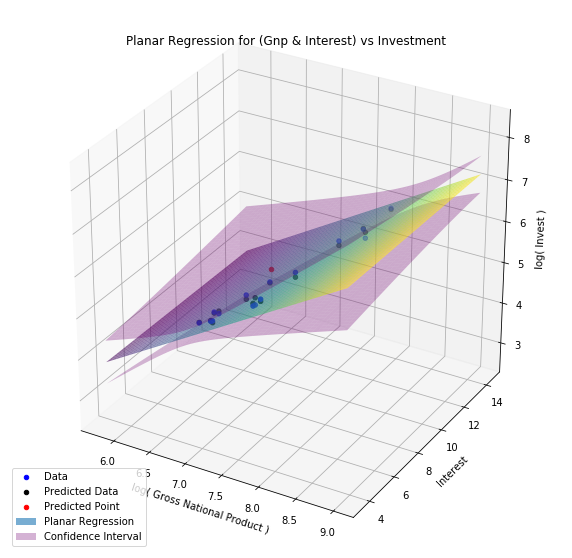

In [58]:
# For analysing the Plot in a Click-Sensitive way, uncomment
# the folowing line:
### %matplotlib notebook

# Increasing the Default Figure Size

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Selecting each data for the 3D Scatter Plot

zdata = invest
zdata_pred = y_regr_mv.reshape(-1, 1)
xdata = gnp
ydata = interest
ax.scatter3D(xdata, ydata, zdata, color='b', label='Data')
ax.scatter3D(xdata, ydata, zdata_pred, color='black',
             label='Predicted Data')
ax.scatter3D(np.log(1000), 10, y_11, color='r', label='Predicted Point')

# Plotting the Surface Area

plt_3d_1 = ax.plot_surface(
    X,
    Y,
    Regression_Planar(X, Y),
    cmap='viridis',
    edgecolor='none',
    alpha=0.6,
    label='Planar Regression',
    )
plt_3d_1._facecolors2d = plt_3d_1._facecolors3d
plt_3d_1._edgecolors2d = plt_3d_1._edgecolors3d

plt_3d_2 = ax.plot_surface(
    X,
    Y,
    CI_Upper_Bound(X, Y),
    color='purple',
    edgecolor='none',
    alpha=0.3,
    label='Confidence Interval',
    )
plt_3d_2._facecolors2d = plt_3d_2._facecolors3d
plt_3d_2._edgecolors2d = plt_3d_2._edgecolors3d

plt_3d_3 = ax.plot_surface(
    X,
    Y,
    CI_Botton_Bound(X, Y),
    color='purple',
    edgecolor='none',
    alpha=0.3,
    )
plt_3d_3._facecolors2d = plt_3d_2._facecolors3d
plt_3d_3._edgecolors2d = plt_3d_2._edgecolors3d

ax.set_xlabel('log( Gross National Product )')
ax.set_ylabel('Interest')
ax.set_zlabel('log( Invest )')

# Fixing the scale for the X and Y axis

# ax.set_xlim3d(min(interest) - 1, max(interest) + 1)
# ax.set_ylim3d(min(interest) - 1, max(interest) + 1)

plt.title('Planar Regression for (Gnp & Interest) vs Investment')

plt.legend(loc='lower left')

plt.show()

## Discussion:
Analysing the Plot, it is possible to see a very interesting result. The Regression Plane is representing very well the data. The Confident Interval is relatively accurated. 

### Exercice 13.
Estimate the regression and determination coefficients and predict the necessary log(Investment) for GNP “ 1000 and Interest “ 10 using existing functionality. Again, the class **LinearRegression()** from sklearn.linear_model is suggested but not obligatory; any other available implementation of the linear regression can be used instead. Report the estimated values and make sure that those calculated ‘by hand’ (Steps 10 and 11) coincide with the ones obtained using existing implementation.

In [59]:
# Organising the input arrays for the LinearRegression() function.

x = np.array(gnp)
y = np.array(interest)
z = np.array(invest)

xy = []
xy.append(x)
xy.append(y)
xy = np.transpose(xy)

In [60]:
# Creating of the model and the fitting function
# for training the model.

model = linear_model.LinearRegression()
fitted_model = model.fit(xy, z)
pred = np.array([np.log(1000), 10])

In [61]:
print('Intercept using the LinearRegression(): ', fitted_model.intercept_)
print('Intercept \'by man\': ', *coeffs[0] ) 

print('\nBeta 1 using the LinearRegression(): ', fitted_model.coef_[0])
print('Beta 1 \'by man\': ', *coeffs[1] ) 

print('\nBeta 2 using the LinearRegression(): ', fitted_model.coef_[1])
print('Beta 2 \'by man\': ', *coeffs[2] ) 

print('\nDeterminatio Coeff using the LinearRegression(): ', fitted_model.score(xy,z))
print('Determination Coeff \'by man\': ', *R_2_mv ) 

print('\nZ predicted for Gnp = 1000 and Interest = 10 using the LinearRegression(): ', *fitted_model.predict(pred.reshape(1,-1)))
print('Z predicted for Gnp = 1000 and Interest = 10 \'by man\': ', *y_11 ) 

Intercept using the LinearRegression():  -2.1804547259114004
Intercept 'by man':  -2.1804547259122575

Beta 1 using the LinearRegression():  1.0512426913196595
Beta 1 'by man':  1.0512426913198811

Beta 2 using the LinearRegression():  -0.006528879406068252
Beta 2 'by man':  -0.006528879406102708

Determinatio Coeff using the LinearRegression():  0.9633108306726245
Determination Coeff 'by man':  0.9633108306726244

Z predicted for Gnp = 1000 and Interest = 10 using the LinearRegression():  5.0159837304826835
Z predicted for Gnp = 1000 and Interest = 10 'by man':  5.015983730483013
